In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import sys
sys.path.append('..')
import time

import importlib

from astroLuSt.monitoring import (
    timers as almt,
    errorlogging as alme,
    formatting as almf
)




# ExecTimer

## Standard Usage

In [5]:


importlib.reload(almt)

ET = almt.ExecTimer(verbose=1)

ET.checkpoint_start('Sup Task', comment='Global Task')

ET.checkpoint_start('Sub Task1')
time.sleep(2)
ET.checkpoint_end('Sub Task1')
ET.checkpoint_start('Sub Task2')
time.sleep(3)
ET.checkpoint_end('Sub Task2', comment='TEST')

ET.checkpoint_end('Sup Task')

ET.estimate_runtime('Sup Task', nrepeats=4, ndone=1)

ET.df_protocoll



######################################################################
INFO: Started Sup Task at 2023-11-20T10:34:36

######################################################################
INFO: Started Sub Task1 at 2023-11-20T10:34:36

INFO: Finished Sub Task1 at 2023-11-20T10:34:38
Required time: 0 days 00:00:02
######################################################################

######################################################################
INFO: Started Sub Task2 at 2023-11-20T10:34:38

INFO: Finished Sub Task2 at 2023-11-20T10:34:41
Required time: 0 days 00:00:03
######################################################################

INFO: Finished Sup Task at 2023-11-20T10:34:41
Required time: 0 days 00:00:05
######################################################################
INFO: Total estimated runtime for 4 repeats: 0 days 00:00:20


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Sup Task,2023-11-20 10:34:36,2023-11-20 10:34:41,0 days 00:00:05,1.700476e+09,1.700476e+09,5.056606,Global Task,
1,Sub Task1,2023-11-20 10:34:36,2023-11-20 10:34:38,0 days 00:00:02,1.700476e+09,1.700476e+09,2.013640,,
2,Sub Task2,2023-11-20 10:34:38,2023-11-20 10:34:41,0 days 00:00:03,1.700476e+09,1.700476e+09,3.020305,,TEST


## Usage to have an up-to-date estimate of runtimes

In [6]:

#initialize the timer
ET = almt.ExecTimer(verbose=0)

repeats = 5 #number of times to repeat the loop


#Execute some loop
ET.checkpoint_start('Global Task')  #to monitor total (actual) duration
for idx in range(repeats):

    #monitor duration of each loop-execution
    ET.checkpoint_start(f'Subtask{idx}')

    #generate random sleeptime (should average out to be 1)
    time.sleep(np.random.normal(1, 0.5, size=1)[0])
    
    ET.checkpoint_end(f'Subtask{idx}')

    #estimate the runtime from the current point of view
    ET.estimate_runtime(r'Subtask', repeats, idx+1)

ET.checkpoint_end('Global Task')

ET.df_protocoll

INFO: Total estimated runtime for 5 repeats: 0 days 00:00:05
INFO: Total estimated runtime for 5 repeats: 0 days 00:00:05
INFO: Total estimated runtime for 5 repeats: 0 days 00:00:05
INFO: Total estimated runtime for 5 repeats: 0 days 00:00:05
INFO: Total estimated runtime for 5 repeats: 0 days 00:00:04


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Global Task,2023-11-20 10:34:44,2023-11-20 10:34:48,0 days 00:00:04,1.700476e+09,1.700476e+09,4.190430,,
1,Subtask0,2023-11-20 10:34:44,2023-11-20 10:34:45,0 days 00:00:01,1.700476e+09,1.700476e+09,0.415547,,
2,Subtask1,2023-11-20 10:34:45,2023-11-20 10:34:46,0 days 00:00:01,1.700476e+09,1.700476e+09,1.306361,,
3,Subtask2,2023-11-20 10:34:46,2023-11-20 10:34:47,0 days 00:00:01,1.700476e+09,1.700476e+09,1.017011,,
4,Subtask3,2023-11-20 10:34:47,2023-11-20 10:34:48,0 days 00:00:01,1.700476e+09,1.700476e+09,0.554990,,
5,Subtask4,2023-11-20 10:34:48,2023-11-20 10:34:48,0 days 00:00:00,1.700476e+09,1.700476e+09,0.868186,,


## Usage as decorator

### Timing one function

In [7]:
ET.verbose = 1
@ET.time_exec(start_kwargs={'comment':'timed_func'})
def timed_func():
    time.sleep(np.random.rand())
    return 'FINISHED'
tf = timed_func()



######################################################################
INFO: Started Decorator Task at 2023-11-20T10:34:55

INFO: Finished Decorator Task at 2023-11-20T10:34:55
Required time: 0 days 00:00:00
######################################################################


### Getting execution statistics

C:\Users\lukas\AppData\Local\Programs\Python\Python310\lib\site-packages\astroLuSt\monitoring\timers.py:436: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


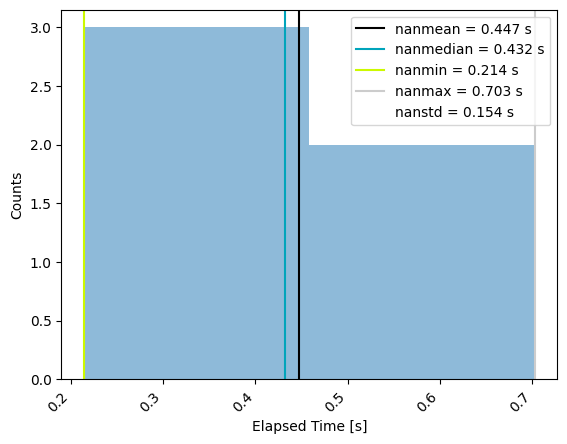

,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
7,get_execstats(),2023-11-20 10:34:59,2023-11-20 10:34:59,0 days 00:00:00,1.700476e+09,1.700476e+09,0.415488,__get_execstats()__,__get_execstats()__
8,get_execstats()1,2023-11-20 10:34:59,2023-11-20 10:35:00,0 days 00:00:01,1.700476e+09,1.700477e+09,0.702508,__get_execstats()__,__get_execstats()__
9,get_execstats()2,2023-11-20 10:35:00,2023-11-20 10:35:00,0 days 00:00:00,1.700477e+09,1.700477e+09,0.337268,__get_execstats()__,__get_execstats()__
10,get_execstats()3,2023-11-20 10:35:00,2023-11-20 10:35:00,0 days 00:00:00,1.700477e+09,1.700477e+09,0.322113,__get_execstats()__,__get_execstats()__
11,get_execstats()4,2023-11-20 10:35:00,2023-11-20 10:35:01,0 days 00:00:01,1.700477e+09,1.700477e+09,0.660573,__get_execstats()__,__get_execstats()__
12,get_execstats()5,2023-11-20 10:35:01,2023-11-20 10:35:01,0 days 00:00:00,1.700477e+09,1.700477e+09,0.289406,__get_execstats()__,__get_execstats()__
13,get_execstats()6,2023-11-20 10:35:01,2023-11-20 10:35:02,0 days 00:00:01,1.700477e+09,1.700477e+09,0.448497,__get_execstats()__,__get_execstats()__
14,get_execstats()7,2023-11-20 10:35:02,2023-11-20 10:35:02,0 days 00:00:00,1.700477e+09,1.700477e+09,0.214166,__get_execstats()__,__get_execstats()__
15,get_execstats()8,2023-11-20 10:35:02,2023-11-20 10:35:03,0 days 00:00:01,1.700477e+09,1.700477e+09,0.507011,__get_execstats()__,__get_execstats()__
16,get_execstats()9,2023-11-20 10:35:03,2023-11-20 10:35:03,0 days 00:00:00,1.700477e+09,1.700477e+09,0.574454,__get_execstats()__,__get_execstats()__


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Global Task,2023-11-20 10:34:44,2023-11-20 10:34:48,0 days 00:00:04,1.700476e+09,1.700476e+09,4.190430,,
1,Subtask0,2023-11-20 10:34:44,2023-11-20 10:34:45,0 days 00:00:01,1.700476e+09,1.700476e+09,0.415547,,
2,Subtask1,2023-11-20 10:34:45,2023-11-20 10:34:46,0 days 00:00:01,1.700476e+09,1.700476e+09,1.306361,,
3,Subtask2,2023-11-20 10:34:46,2023-11-20 10:34:47,0 days 00:00:01,1.700476e+09,1.700476e+09,1.017011,,
4,Subtask3,2023-11-20 10:34:47,2023-11-20 10:34:48,0 days 00:00:01,1.700476e+09,1.700476e+09,0.554990,,
5,Subtask4,2023-11-20 10:34:48,2023-11-20 10:34:48,0 days 00:00:00,1.700476e+09,1.700476e+09,0.868186,,
6,Decorator Task,2023-11-20 10:34:55,2023-11-20 10:34:55,0 days 00:00:00,1.700476e+09,1.700476e+09,0.410240,timed_func,


In [8]:
ET.verbose = 0
@ET.get_execstats(n=10, metrics=None, drop_from_df_protocoll=True)
def evaluated_func():
    time.sleep(np.random.rand())
        
    return 'FINISHED'



ef = evaluated_func()

display(ef)

display(ET.df_protocoll)



# LogErrors

In [6]:

importlib.reload(alme)

x = pd.DataFrame(
    columns=['a', 'b'],
#      data=[[1,2],[2,3]]
)

LE = alme.LogErrors(verbose=1)

for n in range(7):
    try:
        np.concatenate(n,0)
    except Exception as e:
        LE.print_exc(e, prefix='Pre', suffix=f'Suf{n}')
        LE.exc2df(e, prefix='Pre', suffix=f'Suf{n}')
        pass

LE.df_errorlog



Pre
Traceback (most recent call last):
  File "/tmp/ipykernel_165597/2314039420.py", line 12, in <module>
    np.concatenate(n,0)
TypeError: dispatcher for __array_function__ did not return an iterable

Suf0
Pre
Traceback (most recent call last):
  File "/tmp/ipykernel_165597/2314039420.py", line 12, in <module>
    np.concatenate(n,0)
TypeError: dispatcher for __array_function__ did not return an iterable

Suf1
Pre
Traceback (most recent call last):
  File "/tmp/ipykernel_165597/2314039420.py", line 12, in <module>
    np.concatenate(n,0)
TypeError: dispatcher for __array_function__ did not return an iterable

Suf2
Pre
Traceback (most recent call last):
  File "/tmp/ipykernel_165597/2314039420.py", line 12, in <module>
    np.concatenate(n,0)
TypeError: dispatcher for __array_function__ did not return an iterable

Suf3
Pre
Traceback (most recent call last):
  File "/tmp/ipykernel_165597/2314039420.py", line 12, in <module>
    np.concatenate(n,0)
TypeError: dispatcher for __array_func

/home/lukas/github/astroLuSt/demos/../astroLuSt/monitoring/errorlogging.py:182: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  


,exception,prefix,suffix,file,line,problem line,error msg,time
0,"Traceback (most recent call last):\n File ""/t...",Pre,Suf0,/tmp/ipykernel_165597/2314039420.py,12,"[ np.concatenate(n,0)]",TypeError: dispatcher for __array_function__ d...,2023-12-25 20:23:01.270852
0,"Traceback (most recent call last):\n File ""/t...",Pre,Suf1,/tmp/ipykernel_165597/2314039420.py,12,"[ np.concatenate(n,0)]",TypeError: dispatcher for __array_function__ d...,2023-12-25 20:23:01.273619
0,"Traceback (most recent call last):\n File ""/t...",Pre,Suf2,/tmp/ipykernel_165597/2314039420.py,12,"[ np.concatenate(n,0)]",TypeError: dispatcher for __array_function__ d...,2023-12-25 20:23:01.275841
0,"Traceback (most recent call last):\n File ""/t...",Pre,Suf3,/tmp/ipykernel_165597/2314039420.py,12,"[ np.concatenate(n,0)]",TypeError: dispatcher for __array_function__ d...,2023-12-25 20:23:01.277772
0,"Traceback (most recent call last):\n File ""/t...",Pre,Suf4,/tmp/ipykernel_165597/2314039420.py,12,"[ np.concatenate(n,0)]",TypeError: dispatcher for __array_function__ d...,2023-12-25 20:23:01.280173
0,"Traceback (most recent call last):\n File ""/t...",Pre,Suf5,/tmp/ipykernel_165597/2314039420.py,12,"[ np.concatenate(n,0)]",TypeError: dispatcher for __array_function__ d...,2023-12-25 20:23:01.282084
0,"Traceback (most recent call last):\n File ""/t...",Pre,Suf6,/tmp/ipykernel_165597/2314039420.py,12,"[ np.concatenate(n,0)]",TypeError: dispatcher for __array_function__ d...,2023-12-25 20:23:01.283582


# Formatted Printing

In [18]:
importlib.reload(almf)
verbose = 3

for level in range(3):
    almf.printf(
        msg=f'info at level {level}',
        type='INFO',
        level=level,
        start=4*' ',
        verbose=verbose
    )

INFO(): info at level 0
    INFO(): info at level 1
        INFO(): info at level 2
